In [40]:
import matplotlib.pyplot as plt
from project_imports import *
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [2]:
mapper = DirectoryMapper('elo_merch_cat_reqs')

In [3]:
train = mapper.load_data('train', level='interim')
train

,card_id,feature_1,feature_2,feature_3,first_active_month_YEAR,first_active_month_MONTH,target
0,C_ID_92a2005557,5,2,1,2017,6,-0.820283
1,C_ID_3d0044924f,4,1,0,2017,1,0.392913
2,C_ID_d639edf6cd,2,2,0,2016,8,0.688056
3,C_ID_186d6a6901,4,3,0,2017,9,0.142495
4,C_ID_cdbd2c0db2,1,3,0,2017,11,-0.159749
...,...,...,...,...,...,...,...
201912,C_ID_963962de2c,3,2,1,2017,9,-2.740821
201913,C_ID_1314773c0b,3,1,1,2015,10,0.312917
201914,C_ID_7666735b3d,4,3,0,2017,8,0.093494
201915,C_ID_73f5a0efd0,3,2,1,2016,7,-4.676589


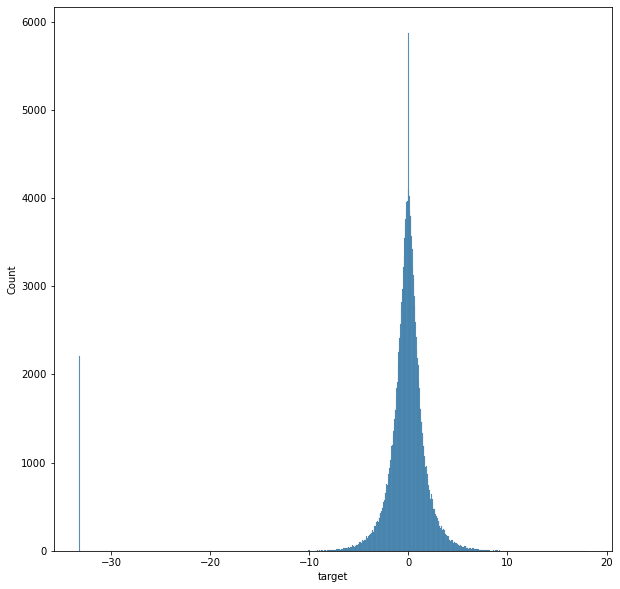

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.histplot(data=train, x='target')


In [41]:
model = XGBRegressor()

params = {'n_estimators': [100, 1000, 5000]
         ,'max_depth': [3, 5, 7]
         ,'colsample_bytree': [0.5, 0.7, 0.8]}

grid = model_selection.GridSearchCV(model, param_grid=params, scoring='r2', cv=5, verbose=True)
grid.fit(train.drop(['card_id', 'target'], axis=1), train['target'])
print(grid.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 100}


In [42]:
print(grid.cv_results_)

{'mean_fit_time': array([  1.08032932,  10.64780717,  45.06153374,   1.80089393,
        13.39916649,  38.09127531,   2.30927792,  16.87612967,
        52.26035876,   1.42634683,  12.935252  ,  81.9362154 ,
         3.14636445,  28.46602297,  91.43965478,   2.87212868,
        27.5567874 , 101.56078396,   1.49272976,  14.45619073,
        73.07893996,   2.56132002,  24.94277163,  65.66645908,
         3.28353305,  14.5819396 ,  40.14249487]), 'std_fit_time': array([6.07598620e-02, 1.04998334e+00, 1.77126164e+00, 2.95602948e-02,
       6.62671438e-01, 2.13847631e+00, 2.23813126e-02, 2.18476248e+00,
       3.91167076e+00, 3.69696317e-02, 2.11237318e-01, 1.26171357e+01,
       1.57363387e-01, 2.92738739e+00, 1.11939282e+01, 5.15862491e-02,
       4.64339866e-01, 4.86877857e+01, 5.84115988e-02, 5.72324422e-01,
       2.62453922e+00, 3.50334553e-01, 1.73667160e+00, 3.47496808e+00,
       4.64458552e-02, 9.97655280e-01, 1.13378827e+00]), 'mean_score_time': array([0.01374993, 0.05885715, 0.21

In [ ]:
best_model = grid.best_estimator_

